In [1]:
import sys
import numpy as np
import xarray as xr
import matplotlib.pylab as plt
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import cmocean
%matplotlib inline
%autosave 60
sys.path.insert(0,'/home/ajayi/Library/regular/')
import SmallBox as sb

Autosaving every 60 seconds


In [2]:
db = '/mnt/meom/workdir/ajayi/Thesis/Thesis_3/Data/w_k_spectra/'
eN60_WT_ke_jfm = xr.open_dataset(db + 'KE_Spectrum_JFM_w_k_from_1h_eNATL60-BLBT02.nc')
eN60_WT_ke_jas = xr.open_dataset(db + 'KE_Spectrum_JAS_w_k_from_1h_eNATL60-BLBT02.nc')
eN60_WT_keT_jfm = xr.open_dataset(db + 'KE_Transfer_Flux_JFM_w_k_from_1h_eNATL60-BLBT02.nc')
eN60_WT_keT_jas = xr.open_dataset(db + 'KE_Transfer_Flux_JAS_w_k_from_1h_eNATL60-BLBT02.nc')

In [3]:
eN60_NT_ke_jfm = xr.open_dataset(db + 'KE_Spectrum_JFM_w_k_from_1h_eNATL60-BLB002.nc')
eN60_NT_ke_jas = xr.open_dataset(db + 'KE_Spectrum_JAS_w_k_from_1h_eNATL60-BLB002.nc')
eN60_NT_keT_jfm = xr.open_dataset(db + 'KE_Transfer_Flux_JFM_w_k_from_1h_eNATL60-BLB002.nc')
eN60_NT_keT_jas = xr.open_dataset(db + 'KE_Transfer_Flux_JAS_w_k_from_1h_eNATL60-BLB002.nc')

In [4]:
# - generate IGWs dispersion curve
database ='/mnt/meom/workdir/ajayi/NATL60/Grid/GLORYS2V3-NATL60_2012_1y_rossby.nc'
Rd = Dataset(database)['sorosrad'][0]
radpsec_to_cph = 3600.0/(2*np.pi)
import seawater as sw
f = sw.f(42.5)
lamda = Rd[sb.jmin:sb.jmax+1,sb.imin:sb.imax+1].mean()*(2*np.pi)/1E3
k = eN60_WT_ke_jfm.wavenumber
m = np.arange(1.,5.0,1)
_omg = []
for i in m:
    omg = f*np.sqrt(1 + (k*lamda/i)**2)
    _omg.append(omg)
omg_ = np.array(_omg)

In [5]:
def plot_igw_disp(axs,clr):
    lw = 1.2
    axs.axhline(y=radpsec_to_cph*f,c=clr,ls='--',lw=lw)
    global omg_
    kh = eN60_WT_ke_jfm.wavenumber 
    for i in range(len(omg_)): 
        if (i == 0) or (i == len(omg_)-1): axs.plot(kh,radpsec_to_cph*omg_[i,:],'--',color =clr,lw=lw)
    axs.axhline(y=M2,c=clr,ls='--',lw=lw)
    #axs.axhline(y=1.5*radpsec_to_cph*f + M2,c=clr,ls='--',lw=1.0)
    axs.text(2E-1,4E-2,r'$f$',fontsize=15,color=clr)
    axs.text(2E-1,9E-2,r'$M_{2}$',fontsize=15,color=clr)
    axs.text(2E-2,4E-1,r'mode 1',fontsize=12,color=clr,rotation=35)
    axs.text(9E-2,4E-1,r'mode 4',fontsize=12,color=clr,rotation=35)

In [6]:
sec_to_hour = 3600.0
norm = LogNorm(vmin=1E-6,vmax=1E-2)
M2 = 0.080511 # Frequency of M2 internal tide

In [7]:
title = ['JFM (eN60-NT)','JAS (eN60-NT)','JFM (eN60-WT)','JAS (eN60-WT)']
index = ['(a)','(b)','(c)','(d)']

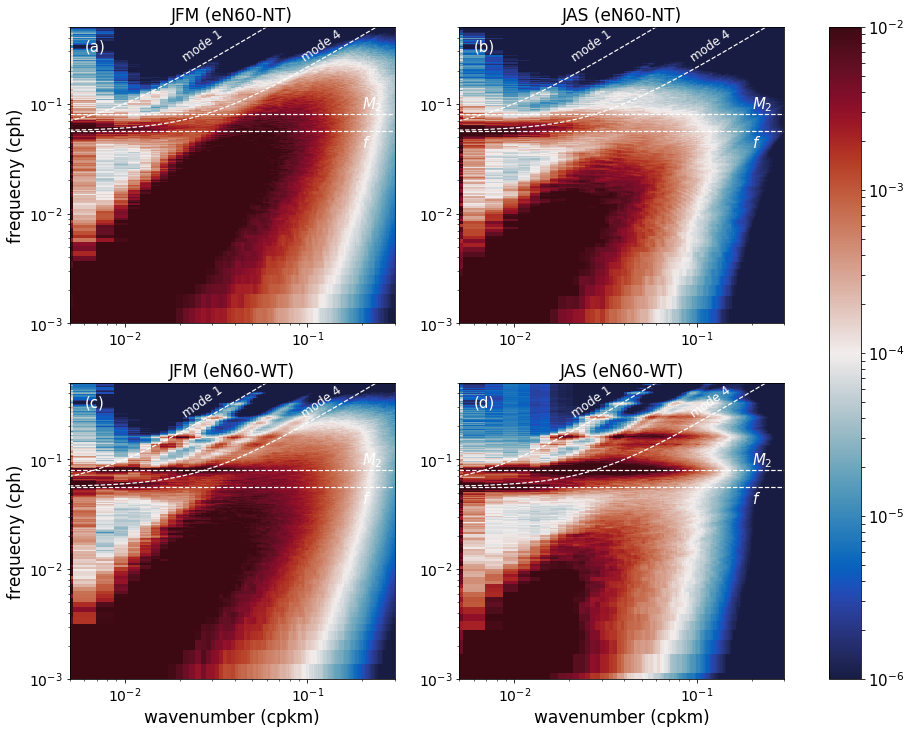

In [8]:
fig,axs = plt.subplots(2,2,figsize=(16,12))
var = [eN60_NT_ke_jfm,eN60_NT_ke_jas,eN60_WT_ke_jfm,eN60_WT_ke_jas]
cmap = cmocean.cm.balance
axs = axs.ravel()
for i in range(len(axs)):
    spec = var[i]
    ff = sec_to_hour*spec.frequency; ww = spec.wavenumber
    a0=axs[i].pcolormesh(ww,ff,spec.Ke_spectrum*ww*ff,norm=norm,cmap=cmap)
    plot_igw_disp(axs[i],clr='w')
    axs[i].text(6E-3,3E-1,index[i],fontsize=15,color='w')
    axs[i].set_xscale("log"); 
    axs[i].set_yscale("log")
    axs[i].set_title(title[i],size=17)
    if (i ==2)or (i==3):
        axs[i].set_xlabel('wavenumber (cpkm)',fontsize=17)
    if (i ==0)or (i==2): 
        axs[i].set_ylabel('frequecny (cph)',fontsize=17); 
    axs[i].set_xlim(spec.wavenumber.min(),spec.wavenumber.max())
    axs[i].set_ylim(1E-3,5E-1)
    axs[i].set_xlim(5E-3,3E-1)
    axs[i].tick_params(labelsize=14)
cb = plt.colorbar(a0,ax=axs.ravel().tolist())
cb.ax.tick_params(labelsize=15)
plt.savefig('/home/ajayi/Thesis_3/Plots/eN60_KE_w_k_psd.png',dpi=300)

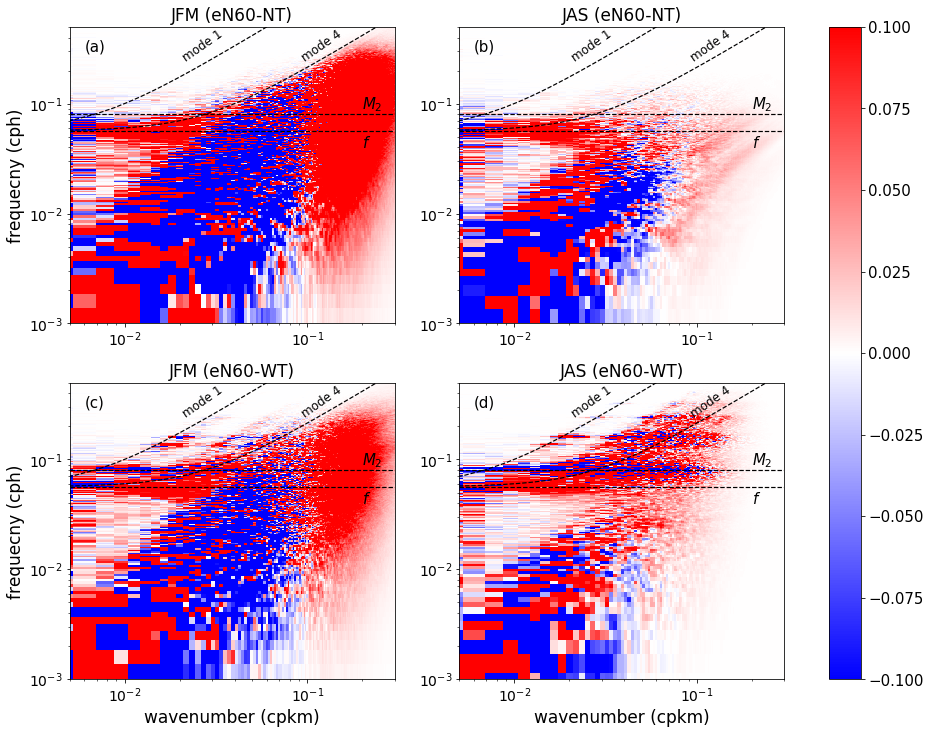

In [9]:
fig,axs = plt.subplots(2,2,figsize=(16,12))
var = [eN60_NT_keT_jfm,eN60_NT_keT_jas,eN60_WT_keT_jfm,eN60_WT_keT_jas]
cmap = 'bwr'
axs = axs.ravel()
for i in range(len(axs)):
    spec = var[i]
    ff = sec_to_hour*spec.frequency; ww = spec.wavenumber
    a0=axs[i].pcolormesh(ww,ff,spec.transfer*ww*ff/1E-10,vmin=-0.1, vmax=0.1,cmap=cmap)
    plot_igw_disp(axs[i],clr='k')
    axs[i].set_xscale("log"); 
    axs[i].set_yscale("log")
    axs[i].set_title(title[i],size=17)
    axs[i].text(6E-3,3E-1,index[i],fontsize=15,color='k')
    if (i ==2)or (i==3):
        axs[i].set_xlabel('wavenumber (cpkm)',fontsize=17)
    if (i ==0)or (i==2): 
        axs[i].set_ylabel('frequecny (cph)',fontsize=17); 
    axs[i].set_xlim(spec.wavenumber.min(),spec.wavenumber.max())
    axs[i].set_ylim(1E-3,5E-1)
    axs[i].set_xlim(5E-3,3E-1)
    axs[i].tick_params(labelsize=14)
cb = plt.colorbar(a0,ax=axs.ravel().tolist())
cb.ax.tick_params(labelsize=15)
plt.savefig('/home/ajayi/Thesis_3/Plots/eN60_KE_w_k_transfer.png',dpi=300)

In [10]:
# - build GM spectrum
import gm
N = 1.2e-3
N0 = 5.2e-3; b = 0.4e3
omg = np.logspace(np.log10(1.01*f), np.log10(N), 401); Omg = np.reshape(omg, (omg.size,1))
j = np.arange(1, 100); J = np.reshape(j, (1,j.size))
K_omg_j = gm.K_omg_j(Omg, J, f, N, N0, b); K_omg = np.sum(K_omg_j, axis=1)

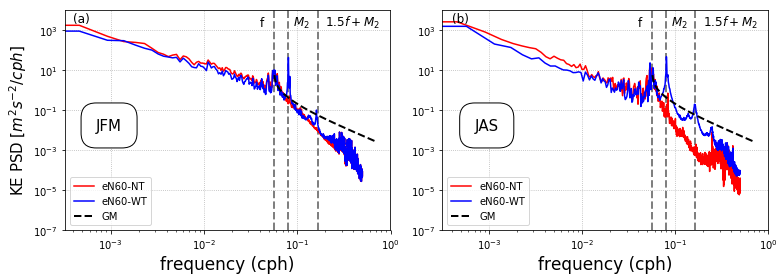

In [11]:
fig,axs = plt.subplots(1,2,figsize=(11,4))
axs = axs.ravel()

for i in range(len(axs)):
    axs[i].axvline(x=radpsec_to_cph*f,ls='--',color='grey',lw=2)
    axs[i].axvline(x=M2,ls='--',color='grey',lw=2)
    axs[i].axvline(x=1.5*radpsec_to_cph*f + M2,ls='--',color='grey',lw=2)
    axs[i].text(4E-2,1.5E3,'f',fontsize=12,color='k')
    axs[i].text(9E-2,1.5E3,r'$M_{2}$',fontsize=12,color='k')
    axs[i].text(2E-1,1.5E3,r'$1.5f + M_{2}$',fontsize=12,color='k')
    axs[i].set_ylim(1E-7,1E4)
    axs[i].set_xlabel('frequency (cph)',fontsize=17)
    axs[i].grid(True,linestyle='dotted')

i =0
axs[i].loglog(eN60_NT_ke_jfm.frequency*sec_to_hour,eN60_NT_ke_jfm.Ke_spectrum.mean(axis=1),'r',label='eN60-NT')
axs[i].loglog(eN60_WT_ke_jfm.frequency*sec_to_hour,eN60_WT_ke_jfm.Ke_spectrum.mean(axis=1),'b',label='eN60-WT')
axs[i].text(7E-4,1E-2,'JFM',fontsize=15,bbox=dict(facecolor='w', edgecolor='black', boxstyle='round,pad=1'))
axs[i].loglog(sec_to_hour*omg/(2*np.pi), K_omg,'k--',label='GM',lw=2)
axs[i].text(4E-4,2.5E3,'(a)',fontsize=12,color='k')
axs[i].set_ylabel('KE PSD '+r'[$m^{2}s^{-2}/cph$]',fontsize=15)
axs[i].legend(loc = 3)

i = 1
axs[i].loglog(eN60_NT_ke_jas.frequency*sec_to_hour,eN60_NT_ke_jas.Ke_spectrum.mean(axis=1),'r',label='eN60-NT')
axs[i].loglog(eN60_WT_ke_jas.frequency*sec_to_hour,eN60_WT_ke_jas.Ke_spectrum.mean(axis=1),'b',label='eN60-WT')
axs[i].text(7E-4,1E-2,'JAS',fontsize=15,bbox=dict(facecolor='w', edgecolor='black', boxstyle='round,pad=1'))
axs[i].loglog(sec_to_hour*omg/(2*np.pi), K_omg,'k--',label='GM',lw=2)
axs[i].text(4E-4,2.5E3,'(b)',fontsize=12,color='k')
axs[i].legend(loc = 3)

fig.tight_layout()
plt.savefig('/home/ajayi/Thesis_3/Plots/eN60_KE_JFM_JAS_omega_PSD.png',dpi=300)

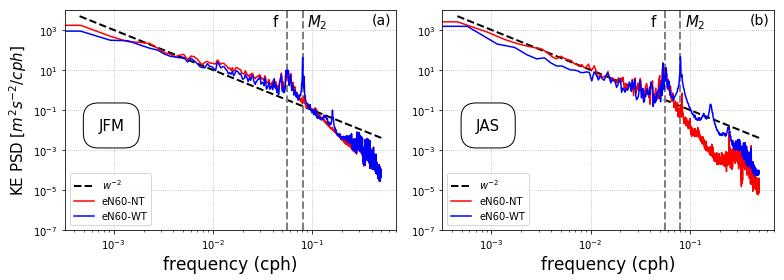

In [27]:
fig,axs = plt.subplots(1,2,figsize=(11,4))
axs = axs.ravel()
freq = eN60_NT_ke_jas.frequency*sec_to_hour; psd = freq**(-2)/1E3

for i in range(len(axs)):
    axs[i].loglog(freq,psd,'k--',lw=2,label='$w^{-2}$')
    axs[i].axvline(x=radpsec_to_cph*f,ls='--',color='grey',lw=2)
    axs[i].axvline(x=M2,ls='--',color='grey',lw=2)
    axs[i].text(4E-2,1.5E3,'f',fontsize=15,color='k')
    axs[i].text(9E-2,1.5E3,r'$M_{2}$',fontsize=15,color='k')
    axs[i].set_ylim(1E-7,1E4)
    axs[i].set_xlabel('frequency (cph)',fontsize=17)
    axs[i].grid(True,linestyle='dotted')

i =0
axs[i].loglog(eN60_NT_ke_jfm.frequency*sec_to_hour,eN60_NT_ke_jfm.Ke_spectrum.mean(axis=1),'r',label='eN60-NT')
axs[i].loglog(eN60_WT_ke_jfm.frequency*sec_to_hour,eN60_WT_ke_jfm.Ke_spectrum.mean(axis=1),'b',label='eN60-WT')
axs[i].text(7E-4,1E-2,'JFM',fontsize=15,bbox=dict(facecolor='w', edgecolor='black', boxstyle='round,pad=1'))
axs[i].text(4E-1,2E3,'(a)',fontsize=14,color='k')
axs[i].set_ylabel('KE PSD '+r'[$m^{2}s^{-2}/cph$]',fontsize=15)
axs[i].legend(loc = 3)

i = 1
axs[i].loglog(eN60_NT_ke_jas.frequency*sec_to_hour,eN60_NT_ke_jas.Ke_spectrum.mean(axis=1),'r',label='eN60-NT')
axs[i].loglog(eN60_WT_ke_jas.frequency*sec_to_hour,eN60_WT_ke_jas.Ke_spectrum.mean(axis=1),'b',label='eN60-WT')
axs[i].text(7E-4,1E-2,'JAS',fontsize=15,bbox=dict(facecolor='w', edgecolor='black', boxstyle='round,pad=1'))
axs[i].text(4E-1,2E3,'(b)',fontsize=14,color='k')
axs[i].legend(loc = 3)

fig.tight_layout()
#plt.savefig('/home/ajayi/Thesis_3/Plots/eN60_KE_JFM_JAS_omega_PSD.png',dpi=300)